In [2]:
import pandas as pd

In [3]:
income_file_path = "./RTI/median_incomes.csv"
rent_file_path = "./RTI/median_rents.csv"

# Skip metadata lines and read the actual data
median_incomes = pd.read_csv(income_file_path, skiprows=6, names=["Neighborhood", "Household","Year", "Currency", "Median Income", "FIPS"])
median_rents = pd.read_csv(rent_file_path, skiprows=6, names=["Neighborhood", "Year", "Currency", "Median Rent", "FIPS"])

FileNotFoundError: [Errno 2] No such file or directory: './RTI/median_incomes.csv'

In [61]:
median_incomes


,Neighborhood,Household,Year,Currency,Median Income,FIPS
0,Riverdale,All Households,2005,Dollars,66429.87643,208
1,Williamsbridge,All Households,2005,Dollars,54603.07992,212
2,Throgs Neck,All Households,2005,Dollars,60436.77167,210
3,Pelham Parkway,All Households,2005,Dollars,55273.71398,211
4,Morrisania,All Households,2005,Dollars,25750.6987,203
...,...,...,...,...,...,...
4155,Brooklyn,Families without Children,2021,Dollars,78468,36047
4156,Manhattan,Families without Children,2021,Dollars,103149,36061
4157,Queens,Families without Children,2021,Dollars,85650,36081
4158,Staten Island,Families without Children,2021,Dollars,104925,36085


In [62]:
median_rents


,Neighborhood,Year,Currency,Median Rent,FIPS
0,Riverdale,2005,Dollars,1102.14859,208
1,Williamsbridge,2005,Dollars,1067.79234,212
2,Throgs Neck,2005,Dollars,1003.20259,210
3,Pelham Parkway,2005,Dollars,1071.91509,211
4,Morrisania,2005,Dollars,770.95432,203
...,...,...,...,...,...
1035,Brooklyn,2021,Dollars,1525.00000,36047
1036,Manhattan,2021,Dollars,1789.00000,36061
1037,Queens,2021,Dollars,1630.00000,36081
1038,Staten Island,2021,Dollars,1306.00000,36085


In [63]:
clean_incomes = median_incomes.loc[median_incomes["Household"].str.contains("All Households", case=False, na=False)]
clean_incomes = clean_incomes.drop(columns=["Household"])
clean_incomes = clean_incomes.drop(columns=["FIPS"])
clean_incomes = clean_incomes.drop(columns=["Currency"])

In [64]:
clean_rents = median_rents.drop(columns=["FIPS"])
clean_rents = clean_rents.drop(columns=["Currency"])

In [72]:


# Merge the two datasets on Neighborhood and Year to align income and rent data
merged_data = pd.merge(clean_rents, clean_incomes, on=["Neighborhood", "Year"])


merged_data["Median Rent"] = pd.to_numeric(merged_data["Median Rent"], errors="coerce")
merged_data["Median Income"] = pd.to_numeric(merged_data["Median Income"], errors="coerce")


# Compute Rent-to-Income Ratio (RTI) as (Median Rent / Median Income) * 100
merged_data["RTI (%)"] = (merged_data["Median Rent"]*12 / merged_data["Median Income"]) * 100

In [73]:
merged_data

,Neighborhood,Year,Median Rent,Median Income,RTI (%)
0,Riverdale,2005,1102.14859,66429.87643,19.909390
1,Williamsbridge,2005,1067.79234,54603.07992,23.466640
2,Throgs Neck,2005,1003.20259,60436.77167,19.919051
3,Pelham Parkway,2005,1071.91509,55273.71398,23.271425
4,Morrisania,2005,770.95432,25750.69870,35.926993
...,...,...,...,...,...
1035,Brooklyn,2021,1525.00000,67567.00000,27.084228
1036,Manhattan,2021,1789.00000,84435.00000,25.425475
1037,Queens,2021,1630.00000,73262.00000,26.698698
1038,Staten Island,2021,1306.00000,86054.00000,18.211820


In [74]:
merged_data.to_csv("nyc_rent_income_rti.csv", index=False)
print("Exported to nyc_rent_income_rti.csv ✅")

Exported to nyc_rent_income_rti.csv ✅


In [79]:
file_path = "./nyc_rent_income_rti.csv"
rti_data = pd.read_csv(file_path)

# Display the first few rows to understand its structure
rti_data.head()


,Neighborhood,Year,Median Rent,Median Income,RTI (%)
0,Riverdale,2005,1102.14859,66429.87643,19.909390
1,Williamsbridge,2005,1067.79234,54603.07992,23.466640
2,Throgs Neck,2005,1003.20259,60436.77167,19.919051
3,Pelham Parkway,2005,1071.91509,55273.71398,23.271425
4,Morrisania,2005,770.95432,25750.69870,35.926993


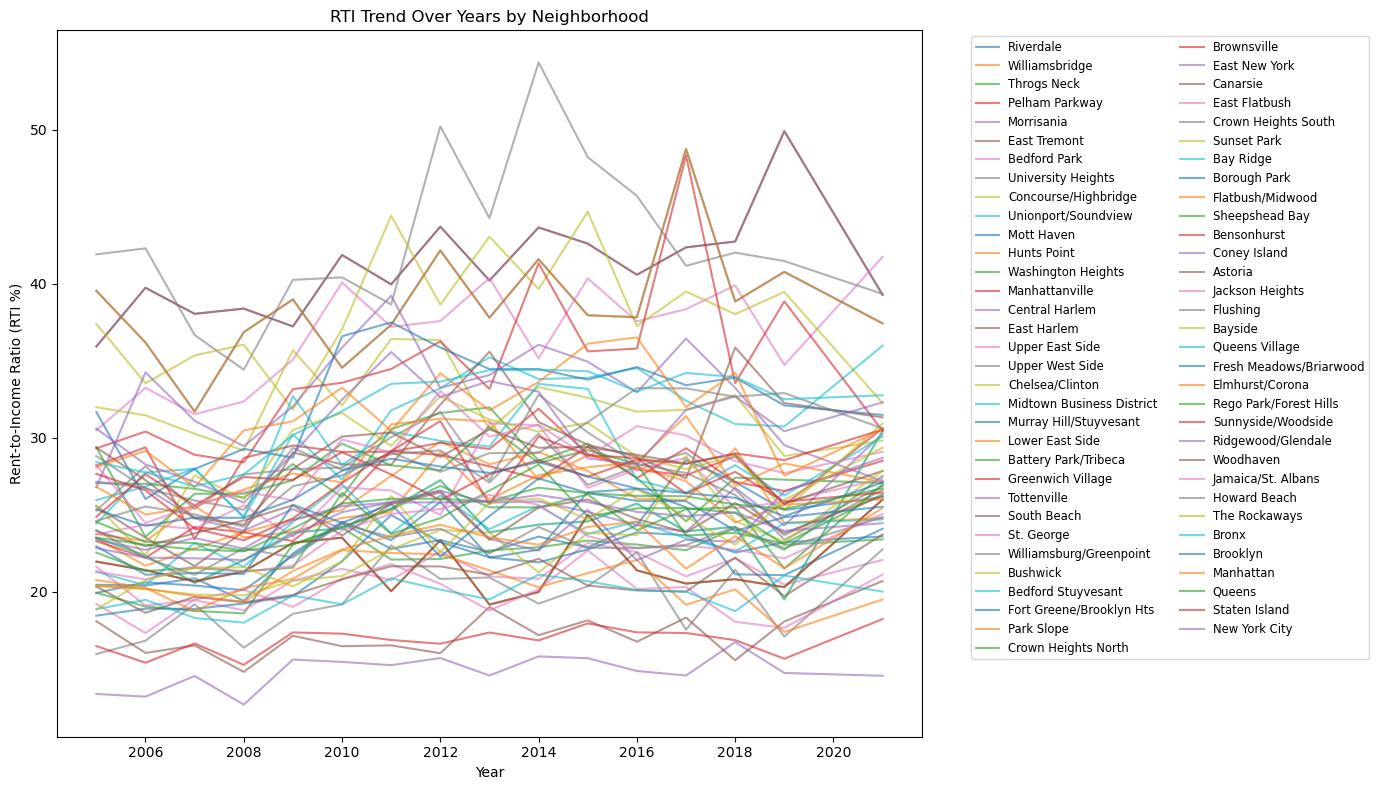

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

# Plot RTI trend lines for all neighborhoods
for neighborhood in rti_data["Neighborhood"].unique():
    neighborhood_data = rti_data[rti_data["Neighborhood"] == neighborhood]
    plt.plot(neighborhood_data["Year"], neighborhood_data["RTI (%)"], label=neighborhood, alpha=0.6)

plt.xlabel("Year")
plt.ylabel("Rent-to-Income Ratio (RTI %)")
plt.title("RTI Trend Over Years by Neighborhood")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', ncol=2)
plt.tight_layout()
plt.savefig("./RTI/RTI.png", dpi=300)
plt.show()


ParserError: Error tokenizing data. C error: Expected 2 fields in line 6, saw 5
